### Topic Suggestion 
1. Fraud Detection in Financial Transactions: A Machine Learning Approach
2. Identifying Fraudulent Transactions: Predictive Modeling
3. Building an Intelligent Fraud Detection System
4. Data-Driven Approach for Transaction Anomaly Detection

### Import the packages

In [51]:
# import relevant libraries
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [52]:
# Path the zip file
zip_file_path = 'data/archive.zip'
extracted_files_path = 'data'

# Checking existence of the output directory
os.makedirs(extracted_files_path, exist_ok=True)

# Unzipping the archive file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_files_path)

print(f"Files extracted to {extracted_files_path}")

Files extracted to data


### Data Familiarization

In [53]:

# Loading dataset to into dataframes
df= pd.read_csv('data/Bank_Transaction_Fraud_Detection.csv')

# Display the first five rows of the dataframe
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [54]:
# Checking the shape of the dataframe
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 200000 rows and 24 columns


In [55]:
# Checking for the column names
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [56]:
# Extracting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [57]:
# Checking for unique values per column
df.nunique()

Customer_ID                200000
Customer_Name              142699
Gender                          2
Age                            53
State                          34
City                          145
Bank_Branch                   145
Account_Type                    3
Transaction_ID             200000
Transaction_Date               31
Transaction_Time            77856
Transaction_Amount         197978
Merchant_ID                200000
Transaction_Type                5
Merchant_Category               6
Account_Balance            197954
Transaction_Device             20
Transaction_Location          148
Device_Type                     4
Is_Fraud                        2
Transaction_Currency            1
Customer_Contact             9000
Transaction_Description       172
Customer_Email               4779
dtype: int64

### Data Cleaning 

In [58]:
df= df.drop(["Customer_ID", "Customer_Name", "City", "Bank_Branch", "Transaction_ID", "Merchant_ID", "Transaction_Location", "Transaction_Currency", "Customer_Contact"], axis =1)
df.head()

,Gender,Age,State,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description,Customer_Email
0,Male,60,Kerala,Savings,23-01-2025,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,POS,0,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,Female,51,Maharashtra,Business,11-01-2025,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,Desktop,0,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,Male,20,Bihar,Savings,25-01-2025,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,Desktop,0,Mutual fund investment,ekaniXXX@XXXXXX.com
3,Female,57,Tamil Nadu,Business,19-01-2025,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,Mobile,0,Food delivery,yaminiXXXXX@XXXXXXX.com
4,Female,43,Punjab,Savings,30-01-2025,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,Mobile,0,Debt repayment,kritikaXXXX@XXXXXX.com


In [59]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
duplicates.info()

Duplicate Rows:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   0 non-null      object 
 1   Age                      0 non-null      int64  
 2   State                    0 non-null      object 
 3   Account_Type             0 non-null      object 
 4   Transaction_Date         0 non-null      object 
 5   Transaction_Time         0 non-null      object 
 6   Transaction_Amount       0 non-null      float64
 7   Transaction_Type         0 non-null      object 
 8   Merchant_Category        0 non-null      object 
 9   Account_Balance          0 non-null      float64
 10  Transaction_Device       0 non-null      object 
 11  Device_Type              0 non-null      object 
 12  Is_Fraud                 0 non-null      int64  
 13  Transaction_Description  0 non-null      object 
 14  Customer_Email        

In [60]:
# Checking the shape of the dataframe
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 200000 rows and 15 columns


In [61]:
# Extracting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   200000 non-null  object 
 1   Age                      200000 non-null  int64  
 2   State                    200000 non-null  object 
 3   Account_Type             200000 non-null  object 
 4   Transaction_Date         200000 non-null  object 
 5   Transaction_Time         200000 non-null  object 
 6   Transaction_Amount       200000 non-null  float64
 7   Transaction_Type         200000 non-null  object 
 8   Merchant_Category        200000 non-null  object 
 9   Account_Balance          200000 non-null  float64
 10  Transaction_Device       200000 non-null  object 
 11  Device_Type              200000 non-null  object 
 12  Is_Fraud                 200000 non-null  int64  
 13  Transaction_Description  200000 non-null  object 
 14  Cust

In [62]:
# Select numerical columns
numerical_cols = ['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud']

# Detect outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in Age: 0
Outliers in Transaction_Amount: 0
Outliers in Account_Balance: 0
Outliers in Is_Fraud: 10088


In [63]:
# Select numerical columns
numerical_cols = ['Age', 'Transaction_Amount', 'Account_Balance']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Print before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (200000, 15)
Cleaned dataset shape: (200000, 15)


In [64]:
# Get summary statistics 
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


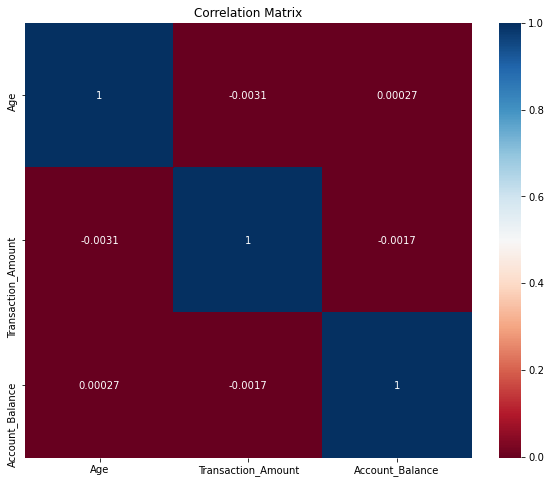

In [16]:
#Correlation for the numeric columns
corr_matrix = df_cleaned[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

### Data Preprosessing 

#### One hot encoding 

In [65]:
# ENCODE CATEGORICAL VARIABLES
categorical_cols = ['Gender', 'Account_Type', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Device_Type']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

df.head()

,Gender,Age,State,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description,Customer_Email
0,1,60,Kerala,2,23-01-2025,16:04:07,32415.45,3,5,74557.27,17,3,0,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,0,51,Maharashtra,0,11-01-2025,17:14:53,43622.60,0,5,74622.66,9,1,0,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,1,20,Bihar,2,25-01-2025,03:09:52,63062.56,0,3,66817.99,0,1,0,Mutual fund investment,ekaniXXX@XXXXXX.com
3,0,57,Tamil Nadu,0,19-01-2025,12:27:02,14000.72,2,2,58177.08,8,2,0,Food delivery,yaminiXXXXX@XXXXXXX.com
4,0,43,Punjab,2,30-01-2025,18:30:46,18335.16,3,2,16108.56,16,2,0,Debt repayment,kritikaXXXX@XXXXXX.com


#### CONVERT DATA TYPES

In [66]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.time

df.head()

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-01-2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-01-2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-01-2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30

,Gender,Age,State,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description,Customer_Email
0,1,60,Kerala,2,2025-01-23,16:04:07,32415.45,3,5,74557.27,17,3,0,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,0,51,Maharashtra,0,2025-11-01,17:14:53,43622.60,0,5,74622.66,9,1,0,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,1,20,Bihar,2,2025-01-25,03:09:52,63062.56,0,3,66817.99,0,1,0,Mutual fund investment,ekaniXXX@XXXXXX.com
3,0,57,Tamil Nadu,0,2025-01-19,12:27:02,14000.72,2,2,58177.08,8,2,0,Food delivery,yaminiXXXXX@XXXXXXX.com
4,0,43,Punjab,2,2025-01-30,18:30:46,18335.16,3,2,16108.56,16,2,0,Debt repayment,kritikaXXXX@XXXXXX.com


#### Scaling

In [ ]:
# ## NORMALIZE NUMERICAL FEATURES (Scaling)
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# df.head()

,Gender,Age,State,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description,Customer_Email
0,1,1.045534,Kerala,2,2025-01-23,16:04:07,-0.599702,3,5,0.807290,17,3,0,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,0,0.456865,Maharashtra,0,2025-11-01,17:14:53,-0.207182,0,5,0.809676,9,1,0,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,1,-1.570771,Bihar,2,2025-01-25,03:09:52,0.473684,0,3,0.524828,0,1,0,Mutual fund investment,ekaniXXX@XXXXXX.com
3,0,0.849311,Tamil Nadu,0,2025-01-19,12:27:02,-1.244660,2,2,0.209460,8,2,0,Food delivery,yaminiXXXXX@XXXXXXX.com
4,0,-0.066396,Punjab,2,2025-01-30,18:30:46,-1.092851,3,2,-1.325919,16,2,0,Debt repayment,kritikaXXXX@XXXXXX.com


#### TRaining the Model 

In [67]:
### 1. DEFINE FEATURES (X) & TARGET (y)
X = df.drop(columns=['Is_Fraud','State','Transaction_Date','Transaction_Time','Transaction_Description','Customer_Email'])  # Features
y = df['Is_Fraud']  # Target variable (Fraud or Not)

### 2. TRAIN-TEST SPLIT (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Modelling 

In [68]:
# TRAIN BASELINE MODEL (LOGISTIC REGRESSION)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37982
           1       0.00      0.00      0.00      2018

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# Decision tree 
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

# model prediction
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)

print('Decision tree score =',round(metrics.accuracy_score(y_test, y_pred_test2)*100,2))
print(" ")
print(classification_report(y_test, y_pred_test2))

Decision tree score = 89.17
 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     37982
           1       0.05      0.06      0.06      2018

    accuracy                           0.89     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.89      0.90     40000



In [70]:
# Random Forest 
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, y_train)

# model prediction
y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(X_test)

# model evaluation
print('Random forest score =',round(metrics.accuracy_score(y_test, y_pred_test3)*100,2))
print(" ")
print(classification_report(y_test, y_pred_test3))

Random forest score = 94.95
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37982
           1       0.00      0.00      0.00      2018

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



In [71]:
### FINAL ACCURACY CHECK
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.5f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.5f}")
print(f"Decision tree score: {accuracy_score(y_test, y_pred_test2):.5f}")


Logistic Regression Accuracy: 0.94955
Random Forest Accuracy: 0.94950
Decision tree score: 0.89172


In [ ]:
### FINAL ACCURACY CHECK
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.5f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.5f}")
print(f"Decision tree score: {accuracy_score(y_test, y_pred_test2):.5f}")